# Домашнее задание №3

# Выполнил Салабай В.Р. (ФПэ-01-22)

Задание №1 
Для одной из промежуточных ступеней паровой турбины построить графически треугольники скоростей для 10 сечений равномерно распределенных по высоте при следующих исходных данных:

In [53]:
#Загружаем библиотеки
import iapws
import math
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt

In [54]:
#СИ
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [55]:
n = 10  #кол-во сечений
p_0 = 16.7 * MPa
t_0 = to_kelvin(520)
p_2 = 14.5 * MPa
D_cp = 0.892
D_korn = 0.8
po_ср = 0.2
alf_1_ср = 13 
delta_beta_deg = 5
fi = 0.97
psi = 0.935
rotation_speed = 50

In [56]:
D_kray = 2 * D_cp - D_korn
shag = ( D_kray - D_korn)/10 
d = []
for i in range(10):
    d.append(round((D_korn + shag * i),3))

Проверка
234.05275229038577=234.0527522903858
*************************************************


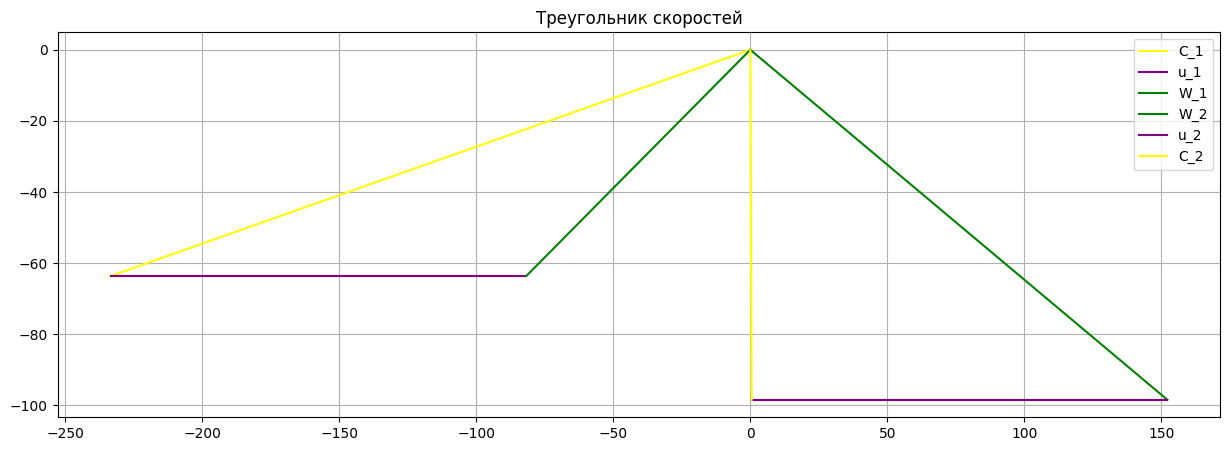

In [58]:
for D in d:
    print (f'Расчет треугольника скоростей для слоя № {D}')
#Значения для расчета
    degree_of_reactionnn = -((D/D_cp)**(-1.7)*(1-po_ср)-1)
    alpha_1_deg = ((D/D_cp)**(2)*alf_1_ср)
#Рассчитываем 
    inlet_point = gas(P=p_0 * unit, T=t_0)
    outlet_point = gas(P=p_2 * unit, s=inlet_point.s)
    theoretical_heat_drop = inlet_point.h - outlet_point.h
    stator_heat_drop = theoretical_heat_drop * (1 - degree_of_reactionnn) 
    rotor_heat_drop = theoretical_heat_drop * degree_of_reactionnn
    sin_alpha_1 = math.sin(math.radians(alpha_1_deg))
    cos_alpha_1 = math.cos(math.radians(alpha_1_deg))

    c_1t = (2 * 1000 * stator_heat_drop) ** 0.5
    c_1 = c_1t * fi
    u = math.pi * D * rotation_speed
    
    w_1 = (c_1 ** 2 + u ** 2 - 2 * c_1 * u * cos_alpha_1) ** 0.5
    w_2t = (w_1 ** 2 + 2 * rotor_heat_drop * 1000) ** 0.5
    w_2 = w_2t * psi
    
    beta_1 = math.atan(sin_alpha_1 / (cos_alpha_1 - u / c_1))
    beta_1_deg = math.degrees(beta_1)
    beta_2_deg = beta_1_deg - delta_beta_deg
    sin_beta_2 = math.sin(math.radians(beta_2_deg))
    cos_beta_2 = math.cos(math.radians(beta_2_deg))
    
    c_2 = (w_2 ** 2 + u ** 2 - 2 * w_2 * u * cos_beta_2) ** 0.5

#Вектора 
    c1_plot = [[0, -c_1 * cos_alpha_1], [0, -c_1 * sin_alpha_1]]
    u1_plot = [[-c_1 * cos_alpha_1, -c_1 * cos_alpha_1 + u], [-c_1 * sin_alpha_1, -c_1 * sin_alpha_1]]
    w1_plot = [[0, -c_1 * cos_alpha_1 + u], [0, -c_1 * sin_alpha_1]]

    w2_plot = [[0, w_2 * cos_beta_2], [0, -w_2 * sin_beta_2]]
    u2_plot = [[w_2 * cos_beta_2, w_2 * cos_beta_2 - u], [-w_2 * sin_beta_2, -w_2 * sin_beta_2]]
    c2_plot = [[0, w_2 * cos_beta_2 - u], [0, -w_2 * sin_beta_2]]

#Строим график
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(c1_plot[0], c1_plot[1], label='C_1', c='yellow')
ax.plot(u1_plot[0], u1_plot[1], label='u_1', c='purple')
ax.plot(w1_plot[0], w1_plot[1], label='W_1', c='green')

ax.plot(w2_plot[0], w2_plot[1], label='W_2', c='green')
ax.plot(u2_plot[0], u2_plot[1], label='u_2', c='purple')
ax.plot(c2_plot[0], c2_plot[1], label='C_2', c='yellow')
ax.set_title("Треугольник скоростей")
ax.legend();
ax.grid()
alpha_2 = math.atan(sin_beta_2 / (cos_beta_2 - u / w_2))
alpha_2_deg = math.degrees(alpha_2)
alpha_2_deg
#Проверяем

print(f'Проверка')
absolute_projection = c_1 * cos_alpha_1 + c_2 * math.cos(alpha_2)
relative_projection = w_1 * math.cos(beta_1) + w_2 * cos_beta_2

assert round(absolute_projection, 5) == round(relative_projection, 5)
print(f'{absolute_projection}={relative_projection}')
print(f'*************************************************')
    

Задание №2 
Для условия задачи 1 построить график зависимости лопаточного кпд на среднем диаметре от степени реактивности ступени
). Степень реактивности взять от 0.05 до 0.8 с шагом 0.001. При численной невозможности вычислить треугольники скоростей при какой-либо степени реактивности, заменить лопаточный КПД при этом значении степени реактивности на None

In [108]:
#Загружаем библотеки
import iapws
import math
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt

In [109]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
kelvin = lambda x: x + 273.15 if x else None

In [110]:
p_0 = 16.7 * MPa
t_0 = kelvin(520)
p_2 = 14.5 * MPa
D_cp = 0.892
alf_1_ср = 13
delta_beta_deg = 5
fi = 0.97
psi = 0.935
shag = 0.001
rotation_speed = 50

In [111]:
po = []
for i in range(751):
    po.append(round((0.05 + shag * i),3))

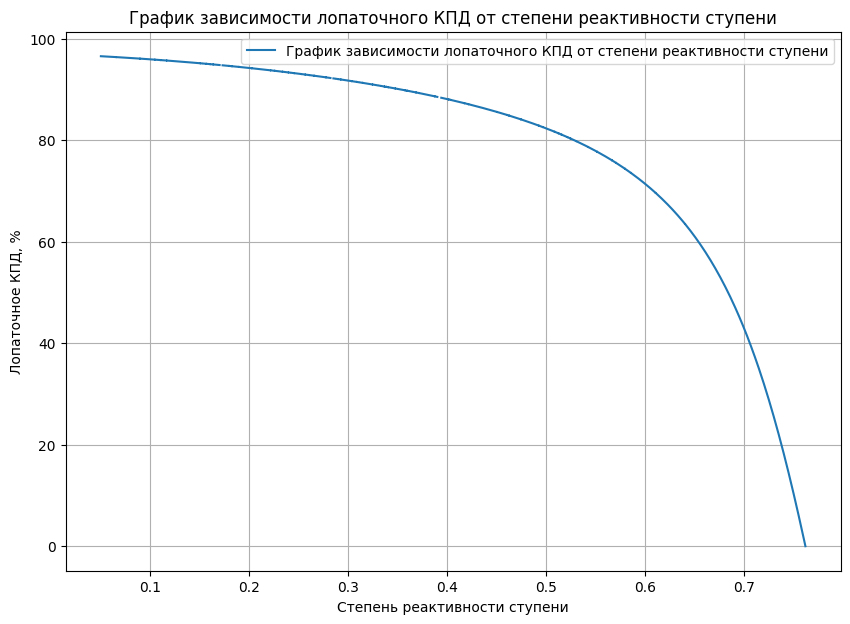

In [113]:
kpd_1 = []
degree_of_reaction_1 = []
kpd_2 = []
degree_of_reaction_2 = []
kpd_3 = []
degree_of_reaction_3 = []
for degree_of_reactionnn in po:
# Основной расчет
    i = i + 1
    inlet_point = gas(P=p_0 * unit, T=t_0)
    outlet_point = gas(P=p_2 * unit, s=inlet_point.s)
    theoretical_heat_drop = inlet_point.h - outlet_point.h
    stator_heat_drop = theoretical_heat_drop * (1 - degree_of_reactionnn) 
    rotor_heat_drop = theoretical_heat_drop * degree_of_reactionnn
    

    c_1t = (2 * 1000 * stator_heat_drop) ** 0.5
    c_1 = c_1t * fi
    u = math.pi * D_cp * rotation_speed

    sin_alpha_1 = math.sin(math.radians(alf_1_ср))
    cos_alpha_1 = math.cos(math.radians(alf_1_ср))

    w_1 = (c_1 ** 2 + u ** 2 - 2 * c_1 * u * cos_alpha_1) ** 0.5
    w_2t = (w_1 ** 2 + 2 * rotor_heat_drop * 1000) ** 0.5
    w_2 = w_2t * psi

# Введем дополнительный расчёт, чтобы избежать отрицательных 
# значений углов в треугольнике скоростей( Прямоугольный треугольник, образованный катедами а,b и гипотенузой с)
    a = cos_alpha_1 * c_1-u # Катед прилегающий к углу бетта 1 
    c = w_1 # Гипотенуза треугольника
    beta_1 = math.acos(a/c)
    beta_1_deg = math.degrees(beta_1)
    sin_beta_1 = math.sin(math.radians(beta_1_deg))
    cos_beta_1 = math.cos(math.radians(beta_1_deg))
    beta_2_deg = beta_1_deg - delta_beta_deg
    sin_beta_2 = math.sin(math.radians(beta_2_deg))
    cos_beta_2 = math.cos(math.radians(beta_2_deg))
    
    c_2 = (w_2 ** 2 + u ** 2 - 2 * w_2 * u * cos_beta_2) ** 0.5
    
    outlet_speed_loss = 0.5 * c_2 ** 2
    stator_speed_loss = 0.5 * ((c_1t ** 2) - (c_1 ** 2))
    rotor_speed_loss = 0.5 * ((w_2t ** 2) - (w_2 ** 2))
# Ввел дополнительный расчёт, чтобы избежать отрицательных 
# значений углов в треугольнике скоростей (Прямоугольный треугольник, образованный катедами а,b и гипотенузой с)
    a = sin_beta_2 * w_2 # Катет напротив угла альфа 2 
    c = c_2 #Гипотенуза треугольника
    alpha_2 = math.asin(a/c)
    alpha_2_deg = math.degrees(alpha_2)
    cos_alpha_2 = math.cos(math.radians(alpha_2_deg))

# Расчет лопаточного КПД 
 
    constant_part_1 = theoretical_heat_drop * 1000 - stator_speed_loss - rotor_speed_loss
    useful_energy_1 = constant_part_1 - outlet_speed_loss
    kpdd_1 = useful_energy_1 / constant_part_1 * 100
    

# В случае невозможности вычислить треугольники скоросте, необходимо заменить лопаточный КПД на None 
#(при данном значении степени реактивности)
    absolute_projection = c_1 * cos_alpha_1 + c_2 * math.cos(alpha_2)
    relative_projection = w_1 * math.cos(beta_1) + w_2 * cos_beta_2
    if kpdd_1 > 0:
        kpd_1.append(kpdd_1)
        degree_of_reaction_1.append(degree_of_reactionnn)
        if absolute_projection == relative_projection: 
            kpd_1.append(None)
            degree_of_reaction_1.append(degree_of_reactionnn)
    

fig, graf = plt.subplots(1, 1, figsize=(10, 7))
plt.title("График зависимости лопаточного КПД от степени реактивности ступени")
plt.xlabel("Степень реактивности ступени")
plt.ylabel("Лопаточное КПД, %")
plt.plot(degree_of_reaction_1 ,kpd_1, label = 'График зависимости лопаточного КПД от степени реактивности ступени')
plt.grid()
plt.legend()

Написать код отрисовывающий процесс расширения в турбине с промежуточным перегревом в PV-диаграмме.
Для примера отрисовки взять расчет при:
𝑃0 = 25 МПа,
 𝑡0 = 560 K,
 𝑃𝑘 = 3.5 кПа,
 𝑃пп = 3.62 МПа,
 𝑡пп = 565 K,
 𝜂𝑜𝑖 = 0.85,
 𝜂мех = 0.995,
 𝜂эл = 0.99,

In [17]:
#Загружаем библтотеку
from iapws import IAPWS97
from typing import List, Tuple, Optional
import matplotlib.pyplot as plt
import numpy as np
from math import log10
from iapws import IAPWS97 as gas

In [23]:
#СИ
kPa = 10 ** 3
MPa = 10 ** 6
unit = 1 / MPa
kelvin = lambda x: x + 273.15 if x else None

In [24]:
#Начальное давление
p_0 = 25 * MPa 

#Начальная температура
t_0 = 560 

#Давление промперегрева
p_middle = 3.62 * MPa 

#Температура промперегрева
t_middle = 565 

#Давление в конденсаторе
p_k = 3.5 * kPa 

In [25]:
t_fd_water = 269
p_fd_water = 1.35 * p_0

internal_kpd = 0.85
mechanicheskoe_kpd = 0.995
generatornoe_kpd = 0.99

delta_p0 = 0.05 * p_0
delta_p_middle = 0.1 * p_middle
delta_p_1 = 0.03 * p_middle


realnoe_p0 = p_0 - delta_p0
realnoe_p1t = p_middle + delta_p_middle
realnoe_p_middle = p_middle - delta_p_1

point___0 = gas(P = p_0 * unit, T=kelvin(t_0))
point_0 = gas(P=realnoe_p0 * unit, h=point___0.h)
point_1t = gas(P=realnoe_p1t * unit, s=point___0.s)

hp_heat_drop = (point___0.h - point_1t.h) * internal_kpd
h_1 = point_0.h - hp_heat_drop
point_1 = gas(P=realnoe_p1t * unit, h=h_1)

point_mid = gas(P=p_middle * unit, T=kelvin(t_middle))
point_middle = gas(P=realnoe_p_middle * unit, h=point_mid.h)
point_2t = gas(P=p_k * unit, s=point_mid.s)

lp_heat_drop = (point_mid.h - point_2t.h) * internal_kpd
h_2 = point_middle.h - lp_heat_drop
point_2 = gas(P=p_k * unit, h=h_2)

def const_line(degree_dry, pressure_range):
    v_znach = []
    p_znach = []
    
    for P in pressure_range:
        try:
            point = IAPWS97(P=P, x=degree_dry)
            v_znach.append(point.v)
            p_znach.append(point.P)
        except ValueError:
            continue

    return np.array(v_znach), np.array(p_znach)

def points(ax: plt.Axes, point_start: IAPWS97, point_end: IAPWS97, num_points: int = 100, **kwargs):
    s_znach = np.linspace(point_start.s, point_end.s, num_points)
    
    v_znach = []
    p_znach = []
    for s in s_znach:
        h = np.interp(s, [point_start.s, point_end.s], [point_start.h, point_end.h])
        try:
            intermediate_point = IAPWS97(s=s, h=h)
            v_znach.append(intermediate_point.v)
            p_znach.append(intermediate_point.P)
        except ValueError:
            continue
    
    ax.plot(v_znach, p_znach, **kwargs)


degrees_dry = [point_2.x, point_2t.x, 1]

pressure_range = np.logspace(-3, 0.4, 100)
v_range = np.logspace(-3, 2, 100)

# Строим график зависимости
fig, ax = plt.subplots(figsize=(10, 10))

for degree in degrees_dry:
    v_znach, p_znach = const_line(degree, pressure_range)
    ax.plot(v_znach, p_znach, label=f'Линия сухости x={degree:.2f}')

# fig, ax = plt.subplots(figsize=(10, 10))
points(ax, point___0, point_1, color='purple', label='Кривая интерполяции')
ax.scatter(point___0.v, point___0.P, color='yellow') #, label='Начальная точка'
ax.scatter(point_1.v, point_1.P, color='yellow') #, label='Конечная точка'

points(ax, point___0, point_1t, color='purple')
ax.scatter(point___0.v, point___0.P, color='red')
ax.scatter(point_1t.v, point_1t.P, color='red')

points(ax, point_1, point_mid, color='purple')
ax.scatter(point_1.v, point_1.P, color='red')
ax.scatter(point_mid.v, point_mid.P, color='red')

points(ax, point_mid, point_2, color='purple')
ax.scatter(point_mid.v, point_mid.P, color='red')
ax.scatter(point_2.v, point_2.P, color='red')

points(ax, point_mid, point_2t, color='purple')
ax.scatter(point_mid.v, point_mid.P, color='red')
ax.scatter(point_2t.v, point_2t.P, color='red')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$v, \frac{м^3}{кг}$", fontsize=14)
ax.set_ylabel(r"$P, \text{МПа}$", fontsize=14)
ax.set_title("Процесс расширения газа в турбине", fontsize=18)
ax.legend()
ax.grid()
plt.show()

ValueError: 
P, \text{МПа}
   ^
ParseFatalException: Unknown symbol: \text, found '\'  (at char 3), (line:1, col:4)

<Figure size 1000x1000 with 1 Axes>